# PYTHON PROGRAMMING 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

# 기온데이터 분석

### 1907년부터 2018년3월까지의 서울 기온 데이터를 CSV로 다운로드 한다.

### - 다운로드 파일을 미리 제공해서 폴더에 넣어두었습니다. seoul.csv 파일을 열어 보세요. encoding='cp949'

In [4]:
df = pd.read_csv('../data/seoul.csv', encoding='cp949')

In [6]:
df.describe()

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
count,39926.0,39170.000000,39169.000000,39168.000000
mean,108.0,11.672716,7.374237,16.684921
std,0.0,10.664129,10.887584,10.996621
min,108.0,-19.200000,-23.100000,-16.300000
25%,108.0,2.600000,-1.500000,7.100000
50%,108.0,12.900000,7.900000,18.500000
75%,108.0,21.200000,17.000000,26.200000
max,108.0,33.100000,28.800000,38.400000


In [8]:
df['날짜'].describe()

count          39926
unique         39926
top       1907-10-01
freq               1
Name: 날짜, dtype: object

## 실습 1. 가장 더운날은 언제입니까?

In [11]:
df['최고기온(℃)'].max()

38.4

In [14]:
df['최고기온(℃)'] == df['최고기온(℃)'].max()

0        False
1        False
2        False
3        False
4        False
         ...  
39921    False
39922    False
39923    False
39924    False
39925    False
Name: 최고기온(℃), Length: 39926, dtype: bool

In [16]:
df.loc[ df['최고기온(℃)'] == df['최고기온(℃)'].max() , ]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
31277,1994-07-24,108,33.1,28.1,38.4


In [17]:
# 정렬

In [22]:
df.sort_values('최고기온(℃)', ascending=False).head(1)

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
31277,1994-07-24,108,33.1,28.1,38.4


## 실습 2. 최고기온을 히스토그램으로 나타내되, bin의 범위를 4도로 만들어서, 히스토그램으로 보여주세요.

In [28]:
df['최고기온(℃)'].min()

-16.3

In [29]:
df['최고기온(℃)'].max()

38.4

In [31]:
# 4도 단위로 구간설정.  시작값, 끝값을 먼저 설정하면 된다. 
my_bins = np.arange( -17, 40+4, 4 )

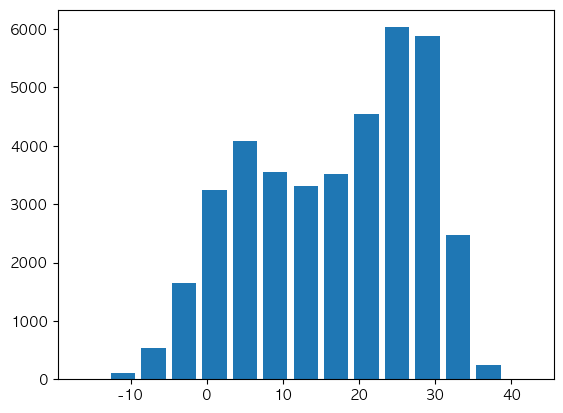

In [32]:
my_bins = np.arange( -17, 40+4, 4 )
plt.hist(data= df, x='최고기온(℃)', rwidth=0.8, bins= my_bins)
plt.show()

In [23]:
df

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4
...,...,...,...,...,...
39921,2018-03-24,108,7.6,4.0,13.1
39922,2018-03-25,108,9.6,4.6,16.9
39923,2018-03-26,108,11.0,5.3,18.1
39924,2018-03-27,108,13.3,7.7,20.0


## 실습 3. 위에서는 모든 날짜에 대한 데이터 입니다.  그러면! 2014년도 부터의 데이터를 기준으로, bin의 범위를 4도로 만들어서, 히스토그램으로 보여주세요.

In [36]:
df['날짜'] >= '2014-01-01'

0        False
1        False
2        False
3        False
4        False
         ...  
39921     True
39922     True
39923     True
39924     True
39925     True
Name: 날짜, Length: 39926, dtype: bool

In [39]:
df_2014 = df.loc[ df['날짜'] >= '2014-01-01' , ]

In [40]:
df_2014

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
38378,2014-01-01,108,4.0,0.3,7.9
38379,2014-01-02,108,1.5,-1.3,6.2
38380,2014-01-03,108,2.3,-1.1,7.3
38381,2014-01-04,108,-0.1,-3.7,5.6
38382,2014-01-05,108,-0.8,-4.3,3.8
...,...,...,...,...,...
39921,2018-03-24,108,7.6,4.0,13.1
39922,2018-03-25,108,9.6,4.6,16.9
39923,2018-03-26,108,11.0,5.3,18.1
39924,2018-03-27,108,13.3,7.7,20.0


In [41]:
df_2014['최고기온(℃)'].min()

-10.7

In [43]:
df_2014['최고기온(℃)'].max()

36.6

In [45]:
my_bins = np.arange(-11, 37+4, 4)

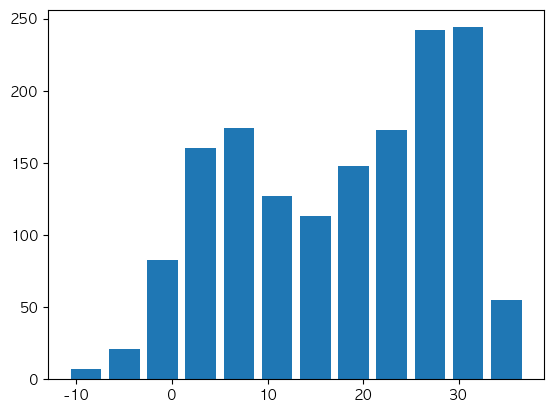

In [46]:
my_bins = np.arange(-11, 37+4, 4)
plt.hist(data= df_2014, x='최고기온(℃)', rwidth=0.8, bins= my_bins)
plt.show()

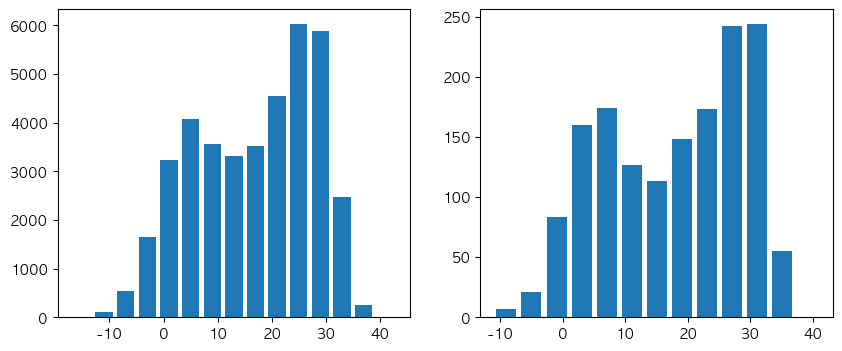

In [50]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)

my_bins = np.arange( -17, 40+4, 4 )
plt.hist(data= df, x='최고기온(℃)', rwidth=0.8, bins= my_bins)

plt.subplot(1, 2, 2)

my_bins = np.arange(-11, 40+4, 4)
plt.hist(data= df_2014, x='최고기온(℃)', rwidth=0.8, bins= my_bins)

plt.show()

## 실습 4.  2017-08-01 ~ 2017-08-15 사이의 데이터에서, 날짜를 x축,  최고기온을 y축으로 스케터로 나타내세요.

In [54]:
( df['날짜'] >= '2017-08-01' )  &  ( df['날짜'] <= '2017-08-15' )

0        False
1        False
2        False
3        False
4        False
         ...  
39921    False
39922    False
39923    False
39924    False
39925    False
Name: 날짜, Length: 39926, dtype: bool

In [56]:
df_new = df.loc[ ( df['날짜'] >= '2017-08-01' )  &  ( df['날짜'] <= '2017-08-15' ) , ]

In [57]:
df_new

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
39686,2017-08-01,108,28.6,24.1,33.0
39687,2017-08-02,108,30.0,26.6,33.0
39688,2017-08-03,108,30.2,27.2,33.9
39689,2017-08-04,108,30.3,25.9,35.3
39690,2017-08-05,108,31.4,27.6,34.8
39691,2017-08-06,108,29.8,28.2,34.0
39692,2017-08-07,108,29.2,26.4,34.4
39693,2017-08-08,108,28.2,25.5,31.0
39694,2017-08-09,108,27.6,24.6,32.0
39695,2017-08-10,108,24.8,23.9,26.3


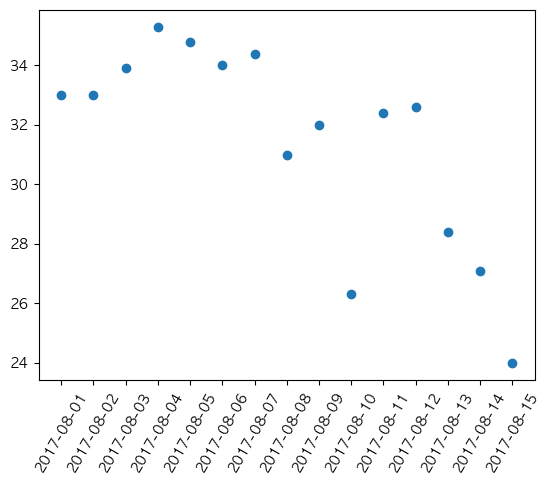

In [59]:
plt.scatter(data= df_new, x='날짜', y='최고기온(℃)')
plt.xticks(rotation=60)
plt.show()